In [2]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -O /tmp/rps.zip
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -O /tmp/rps-test-set.zip

--2020-05-06 15:57:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   169MB/s    in 1.1s    

2020-05-06 15:57:46 (169 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-05-06 15:57:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/t

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total rock images: ', len(os.listdir(rock_dir)))
print('total paper images: ', len(os.listdir(paper_dir)))
print('total scissors images: ', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total rock images:  840
total paper images:  840
total scissors images:  840
['rock06ck02-042.png', 'rock04-106.png', 'rock07-k03-096.png', 'rock07-k03-040.png', 'rock03-108.png', 'rock04-086.png', 'rock07-k03-098.png', 'rock02-108.png', 'rock07-k03-100.png', 'rock03-020.png']
['paper03-026.png', 'paper03-106.png', 'paper07-119.png', 'paper02-070.png', 'paper02-092.png', 'paper04-013.png', 'paper07-026.png', 'paper03-069.png', 'paper01-110.png', 'paper07-021.png']
['scissors02-078.png', 'scissors02-022.png', 'testscissors01-048.png', 'scissors04-012.png', 'scissors02-021.png', 'scissors04-099.png', 'scissors03-061.png', 'scissors03-081.png', 'scissors01-019.png', 'scissors03-056.png']


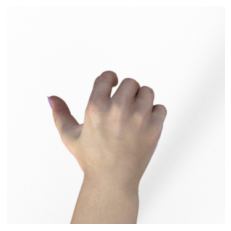

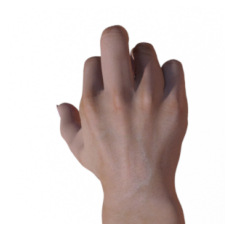

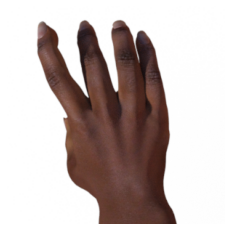

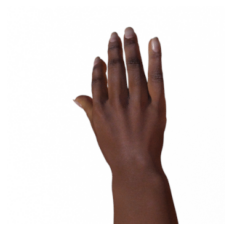

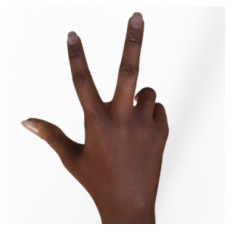

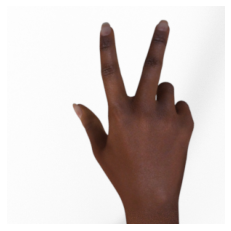

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[0:2]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[0:2]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[0:2]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [7]:
TRAINING_DIR = '/tmp/rps'
VALIDATION_DIR = '/tmp/rps-test-set'

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 128
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 128
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data=validation_generator, validation_steps=3, verbose=1)

model.save('rps.h5')

Epoch 1/25
20/20 [==============================] - 24s 1s/step - loss: 1.0925 - accuracy: 0.3730 - val_loss: 0.9993 - val_accuracy: 0.5753
Epoch 2/25
20/20 [==============================] - 24s 1s/step - loss: 0.9253 - accuracy: 0.5405 - val_loss: 0.7445 - val_accuracy: 0.5108
Epoch 3/25
20/20 [==============================] - 24s 1s/step - loss: 0.6261 - accuracy: 0.7409 - val_loss: 0.2791 - val_accuracy: 0.9462
Epoch 4/25
20/20 [==============================] - 24s 1s/step - loss: 0.5419 - accuracy: 0.7794 - val_loss: 0.2053 - val_accuracy: 0.9704
Epoch 5/25
20/20 [==============================] - 24s 1s/step - loss: 0.4430 - accuracy: 0.8143 - val_loss: 0.1355 - val_accuracy: 1.0000
Epoch 6/25
20/20 [==============================] - 24s 1s/step - loss: 0.3155 - accuracy: 0.8833 - val_loss: 0.1342 - val_accuracy: 0.9489
Epoch 7/25
20/20 [==============================] - 24s 1s/step - loss: 0.2484 - accuracy: 0.9048 - val_loss: 0.1148 - val_accuracy: 0.9651
Epoch 8/25
20/20 [==

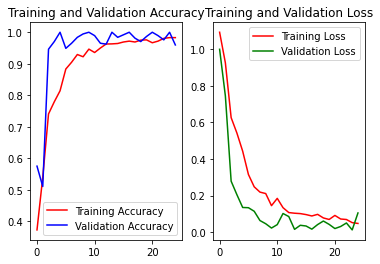

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)

plt.show()

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    print(classes)

Saving IMG_20200127_173536_858.jpg to IMG_20200127_173536_858.jpg
IMG_20200127_173536_858.jpg
[[1. 0. 0.]]
